In [1]:
import numpy as np
import os
import pickle
import data_process


In [2]:
BASE_PATH = '/media/chris/Workspace/Dataset/3d-object-detection-for-autonomous-vehicles/kitti_format/training'
# BASE_PATH = '/media/chris/Workspace/Dataset/kitti/training'
def read_point_cloud():
    point_cloud = np.fromfile(os.path.join(BASE_PATH, 'velodyne/0.bin'), dtype=np.float32).reshape(-1,4)
    return point_cloud

point_cloud = read_point_cloud

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_point_cloud(ax, points, title, axes=[0, 1, 2], point_size=0.2, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    # 设置xyz三个轴的点云范围
    axes_limits = [
        [-20, 80], # X axis range
        [-20, 20], # Y axis range
        [-3, 5]    # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    # 禁止显示背后的网格
    ax.grid(False)
    # 创建散点图[1]:xyz数据集，[2]:点云的大小，[3]:点云的反射率数据,[4]:为灰度显示
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    # 设置画板的标题
    ax.set_title(title)
    # 设置x轴标题
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    # 设置y轴标题
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    if len(axes) > 2:
        # 设置限制角度
        ax.set_xlim3d(*axes_limits[axes[0]])
        ax.set_ylim3d(*axes_limits[axes[1]])
        ax.set_zlim3d(*axes_limits[axes[2]])
        # 将背景颜色设置为RGBA格式，目前的参数以透明显示
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # 设置z轴标题
        ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
    else:
        # 2D限制角度，只有xy轴
        ax.set_xlim(*axes_limits[axes[0]])
        ax.set_ylim(*axes_limits[axes[1]])
    # User specified limits
    if xlim3d!=None:
        ax.set_xlim3d(xlim3d)
    if ylim3d!=None:
        ax.set_ylim3d(ylim3d)
    if zlim3d!=None:
        ax.set_zlim3d(zlim3d)

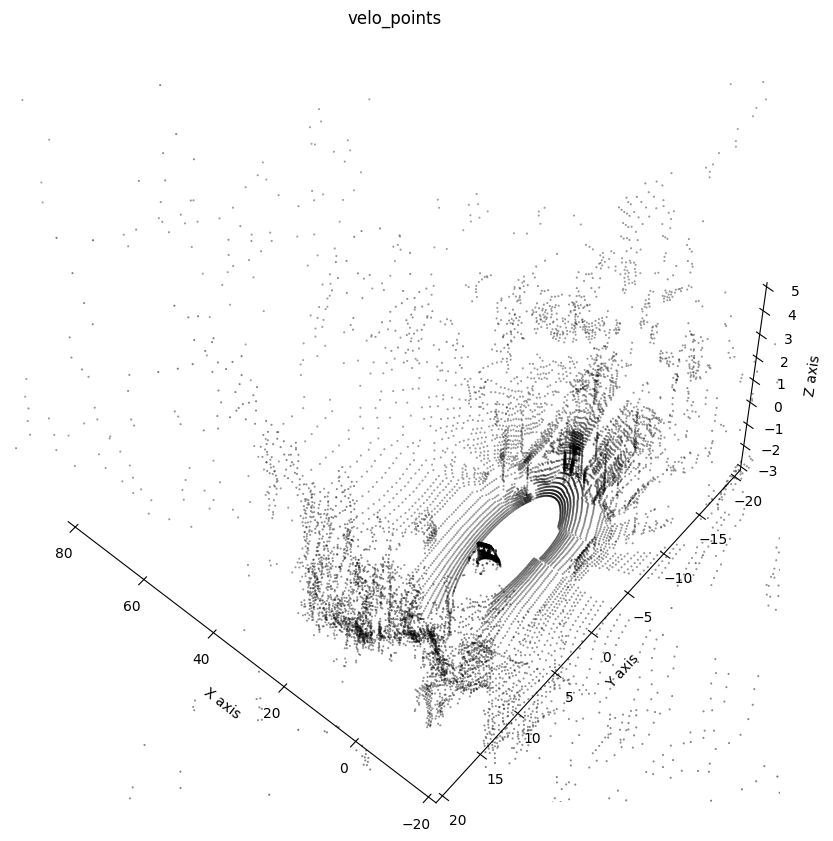

In [4]:
# 获取数据集中的点云数据
point_cloud = read_point_cloud()
# 绘制3D点云数据，创建一个大小为20*10的图形画板
fig = plt.figure(figsize=(20, 10))
# 在画板中添加1*1的网格的第一个子图，为3D图像
ax = fig.add_subplot(111, projection='3d')
# 改变绘制图像的视角，即相机的位置，elev为Z轴角度，azim为(x,y)角度
ax.view_init(60,130)
# 在画板中画出点云显示数据，point_cloud[::x]x值越大，显示的点越稀疏
draw_point_cloud(ax, point_cloud[::5], "velo_points")

In [5]:
import pandas as pd 
LABEL_NAME = ["type", "truncated", "occluded", "alpha", "bbox_left", "bbox_top", "bbox_right", "bbox_bottom", "dimensions_height", "dimensions_width", "dimensions_length", "location_x", "location_y", "location_z", "rotation_y","confidence"] 
df = pd.read_csv(os.path.join(BASE_PATH, "label_2/0.txt"), header=None, sep=" ")
print(type(df))
df.columns = LABEL_NAME
df.loc[df.type.isin(['van','car','truck']),'type'] = 'car'
# df = df[df.type.isin(['car','cyclist','pedestrian'])]
df

<class 'pandas.core.frame.DataFrame'>


,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimensions_height,dimensions_width,dimensions_length,location_x,location_y,location_z,rotation_y,confidence
0,pedestrian,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.4,0.74,0.85,6.57,1.20,-1.76,3.14,0.0
1,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.6,1.84,4.52,17.68,0.48,-34.54,-3.12,0.0
2,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.7,1.84,4.05,23.77,0.36,-34.39,-3.13,0.0
3,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.5,1.81,4.54,11.68,0.76,-32.32,-2.86,0.0
4,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.8,2.01,6.26,-0.14,1.40,-17.90,-1.57,0.0
5,pedestrian,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.7,0.71,0.71,6.40,1.14,-0.69,1.57,0.0
6,car,0.0,0,-10.0,308.92,520.99,472.39,639.47,1.8,1.84,4.50,-3.98,1.81,15.78,1.54,0.0
7,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.9,1.97,4.89,-4.52,1.81,-0.05,1.49,0.0


In [6]:
# box = np.array(df.loc[6,['bbox_left','bbox_top','bbox_right','bbox_bottom']]) 
# import cv2
# # 读取第一帧图片
# img = cv2.imread(BASE_PATH+"/image_2/0.png")
# # 左上角顶点坐标
# left_point = (int(box[0]),int(box[1]))
# # 右下角顶点坐标
# right_point = (int(box[2]),int(box[3]))
# # 画出car的检测框，蓝色，2mm宽度
# cv2.rectangle(img,left_point,right_point,(255,0,0),2)
# cv2.imshow("img",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
def compute_3d_box_cam2(h, w, l, x, y, z, yaw):
    # 计算旋转矩阵
    R = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]])
    # 8个顶点的xyz
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h] 
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]

    # 旋转矩阵点乘(3，8)顶点矩阵
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners,y_corners,z_corners]))
    # print(corners_3d_cam2.shape)
    # 加上location中心点，得出8个顶点旋转后的坐标
    corners_3d_cam2 += np.vstack([x,y,z])
    return corners_3d_cam2
# 计算cam2眼中的3DBox
corners_3d_cam2 = compute_3d_box_cam2(*df.loc[6,['dimensions_height','dimensions_width','dimensions_length','location_x','location_y','location_z','rotation_y']])
# corners_3d_cam2 = compute_3d_box_cam2(df['dimensions_height'],df['dimensions_width'],df['dimensions_length'],df['location_x'],df['location_y'],df['location_z'],df['rotation_y'])

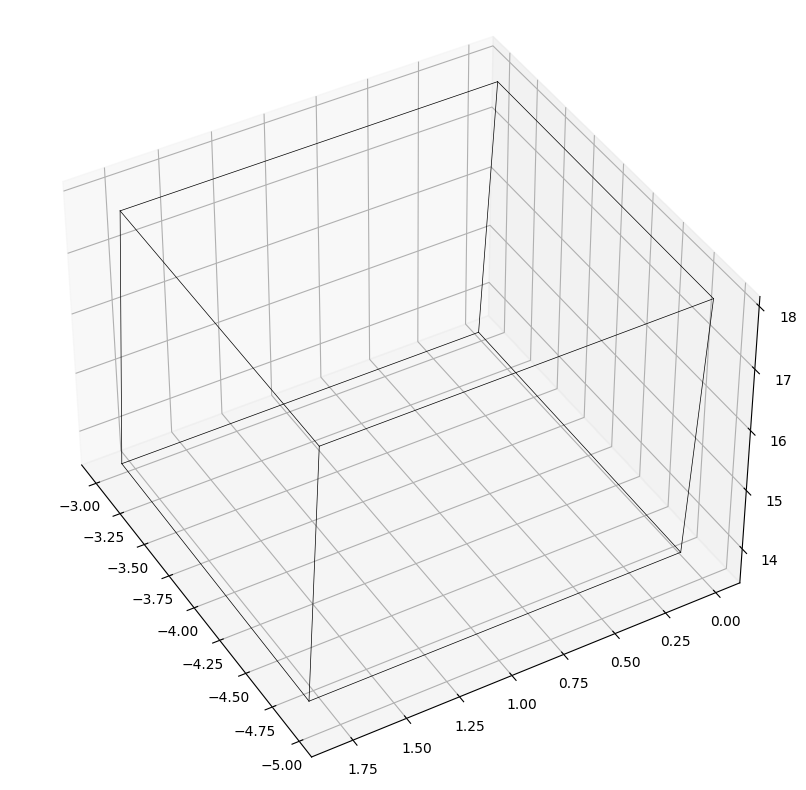

In [8]:
def draw_box(ax, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.

    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        ax.plot(*vertices[:, connection], c=color, lw=0.5)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')    
ax.view_init(40,150)
draw_box(ax,(corners_3d_cam2))

In [9]:
from kitti_util import *
# 读取calibration转换数据
calib = Calibration('/media/chris/Workspace/Dataset/3d-object-detection-for-autonomous-vehicles/kitti_format/training/calib/0.txt', from_video=False)
# cam2转velo坐标系
corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T).T

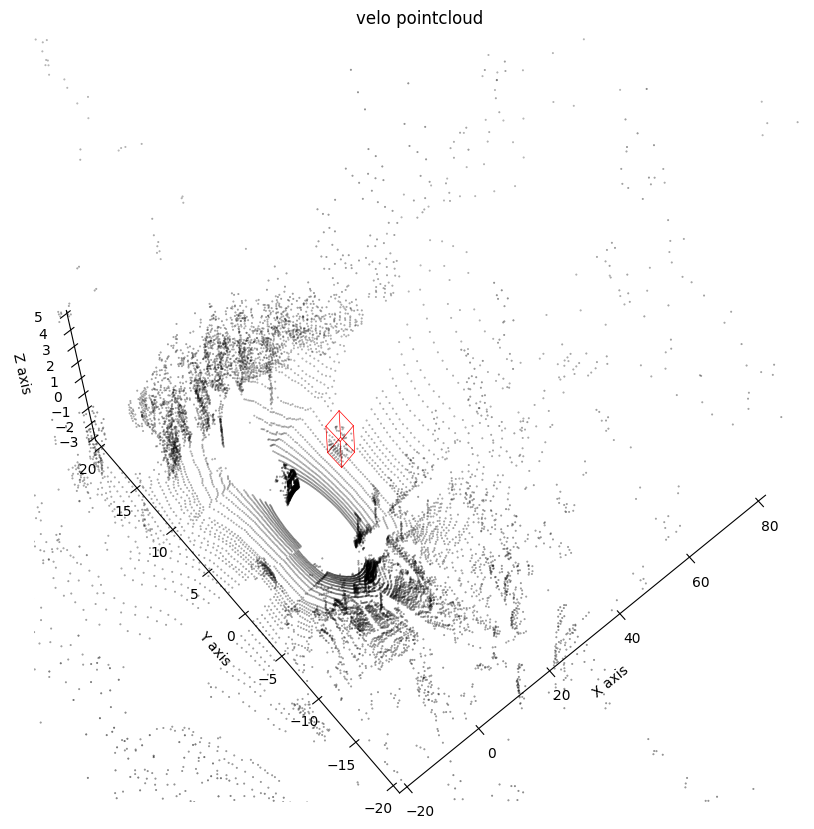

In [10]:
# 和点云做结合
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(70,230)
draw_point_cloud(ax,point_cloud[::5],"velo pointcloud")
draw_box(ax,corners_3d_velo,color='red')